<a href="https://colab.research.google.com/github/dgsmith1988/ECSE-552-Final-Project/blob/achaebe/execution_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overall Script Description
Run through each of the different cells to get things working. What should happen is that you connect to Google Drive, some data is transferred and then unzipped and then the model is trained on it and outputs data indicating correct operation. On the Google Drive there should also be files added under "Measurements" which have a date and time-stamp corresponding to the output of training process. The time stamps are generated by the Google Colab instance so they won't match exactly with your local time depending on where the instance they supplied us is located.

The cells are broken up based on functionality to make it easier to debug/profile/troubleshoot any issues which might come up.

In [1]:
!pip install torchmetrics > /dev/null
!pip install pytorch-lightning > /dev/null
!pip install librosa > /dev/null
!pip install optuna > /dev/null

# Configure Directories/Paths/Languages
The following cell is where you configure which languages you want to work with (from the three which are available on Google Drive at the moment). It is also where you set the paths to where the Google Drive will be mounted and where the data is extracted to.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
languages = ["EN", "DE", "ES"]
mount_point = '/content/drive'
load_path = os.path.join(mount_point, 'MyDrive/ECSE-552-FP/Data/')
unzip_path = '/content/speech_data'
save_path = '/MyDrive/ECSE-552-FP/Measurements'

from google.colab import drive
drive.mount(mount_point,force_remount= True)

Mounted at /content/drive


# Download and extract the dataset zip files
The following downloads and extracts the language zip files from Google Drive. It is done separately in it's own cell to make it easier to profile/debug things if there are issues in the network connection between Google Drive and Google Colab. 

This is separate from dataset creation for two reasons. The first is that if the network accesses are obscured by accessing the data via the network drive, it is much harder to debug bottlenecks in creating the dataset. The second is that all of the data must be transferred once at somepoint during one epoch, so it's easier to do it all up front and make sure the data is on the Colab instance before training. Localizing as much as possible to the Colab instance during training makes things easier to debug as well as more efficient.

There is a commented out code which allows you to select between the "debug" dataset and the "full" dataset for the languages. The "debug" set consists of a smaller subset (20 samples for each language) to aid in debugging the dataflow in models. It alleviates the need to run through the entire dataset and helps ensure all the pipes are connected correctly.

In [4]:
for language in languages:
    language_dir_path = os.path.join(unzip_path, language)
    os.makedirs(language_dir_path, exist_ok=True)
    #archive = language + "_debug_set" + ".zip"
    archive = language + ".zip"
    !unzip {os.path.join(load_path, archive)} -d {language_dir_path} > /dev/null

replace /content/speech_data/EN/1028-20100710-hne/wav/ar-01.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace /content/speech_data/DE/1337ad-20170321-amr/wav/de4-67.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace /content/speech_data/ES/abarzuaf-20101026-caf/wav/es-0027.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Download the source code from GitHub

In [5]:
user = "dgsmith1988"
repo = "ECSE-552-Final-Project"
src_dir = "Code"
pyfiles = ["models.py", "train.py", "dict_logger.py", "feature_extraction.py"]

for pyfile in pyfiles:
    !rm {pyfile}
    url = f"https://raw.githubusercontent.com/{user}/{repo}/achaebe/{src_dir}/{pyfile}"
    !wget {url} > /dev/null


--2022-03-26 02:31:34--  https://raw.githubusercontent.com/dgsmith1988/ECSE-552-Final-Project/achaebe/Code/models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5628 (5.5K) [text/plain]
Saving to: ‘models.py’

models.py           100%[===================>]   5.50K  --.-KB/s    in 0s      

2022-03-26 02:31:34 (50.1 MB/s) - ‘models.py’ saved [5628/5628]

--2022-03-26 02:31:34--  https://raw.githubusercontent.com/dgsmith1988/ECSE-552-Final-Project/achaebe/Code/train.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10023 (9.8K)

# Install the supporting/required libraries



# Hyperparameter tuning

In [ ]:
import optuna
import train

train.hp_tuning_voxforge_classifier(data_dir=unzip_path)

[I 2022-03-26 02:31:53,046] A new study created in memory with name: no-name-c5417dd0-56e0-4b3f-b420-8056e412f8ba
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:14, 21.39it/s]
1601it [01:32, 17.31it/s]
1601it [01:39, 16.06it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Dataset creation in seconds:  267.1024424070001



  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 02:38:43,280] Trial 0 finished with value: 0.8200181722640991 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 0 with value: 0.8200181722640991.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:05, 24.56it/s]
1601it [01:33, 17.10it/s]
1601it [01:40, 15.97it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  259.1073581169999


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 02:45:23,805] Trial 1 finished with value: 0.7401273846626282 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 0 with value: 0.8200181722640991.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:11, 22.36it/s]
1601it [01:34, 16.87it/s]
1601it [01:39, 16.15it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  265.6463739009996


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 02:52:10,284] Trial 2 finished with value: 0.7550500631332397 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 0 with value: 0.8200181722640991.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:18, 20.48it/s]
1601it [01:34, 16.89it/s]
1601it [01:38, 16.19it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  271.89829574600026


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 02:59:03,511] Trial 3 finished with value: 0.8125568628311157 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 0 with value: 0.8200181722640991.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:15, 21.17it/s]
1601it [01:35, 16.85it/s]
1601it [01:39, 16.10it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  270.1296425370001


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 03:05:55,001] Trial 4 finished with value: 0.7921746969223022 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 0 with value: 0.8200181722640991.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:36, 16.67it/s]
1601it [01:33, 17.13it/s]
1601it [01:39, 16.10it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  288.92127962799987


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 03:13:05,833] Trial 5 finished with value: 0.819290280342102 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 0 with value: 0.8200181722640991.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:16, 20.93it/s]
1601it [01:32, 17.26it/s]
1601it [01:38, 16.22it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Dataset creation in seconds:  268.0290131789998


Validation sanity check: 0it [00:02, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 03:19:56,185] Trial 6 finished with value: 0.7681528925895691 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 0 with value: 0.8200181722640991.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:16, 20.90it/s]
1601it [01:33, 17.15it/s]
1601it [01:40, 15.85it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Dataset creation in seconds:  270.9759921800005


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 03:26:47,578] Trial 7 finished with value: 0.7341219186782837 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 0 with value: 0.8200181722640991.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:14, 21.60it/s]
1601it [01:31, 17.58it/s]
1601it [01:39, 16.01it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Dataset creation in seconds:  265.2377099960004


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 03:33:31,997] Trial 8 finished with value: 0.8580527901649475 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 8 with value: 0.8580527901649475.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:18, 20.51it/s]
1601it [01:35, 16.84it/s]
1601it [01:40, 16.00it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  273.2693398580004


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 03:40:23,518] Trial 9 finished with value: 0.6181983351707458 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 8 with value: 0.8580527901649475.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:23, 19.23it/s]
1601it [01:44, 15.27it/s]
1601it [01:42, 15.68it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Dataset creation in seconds:  290.2229168829999


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 03:47:33,458] Trial 10 finished with value: 0.775250256061554 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 8 with value: 0.8580527901649475.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:24, 18.84it/s]
1601it [01:39, 16.07it/s]
1601it [01:41, 15.72it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Dataset creation in seconds:  286.50703915599934


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 03:54:39,400] Trial 11 finished with value: 0.751228392124176 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 8 with value: 0.8580527901649475.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:20, 19.97it/s]
1601it [01:34, 16.95it/s]
1601it [01:40, 16.00it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  274.6636857680005


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 04:01:34,575] Trial 12 finished with value: 0.6313011646270752 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 8 with value: 0.8580527901649475.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:15, 21.10it/s]
1601it [01:32, 17.27it/s]
1601it [01:38, 16.32it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  266.72497892200045


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 04:08:22,138] Trial 13 finished with value: 0.7495905160903931 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 8 with value: 0.8580527901649475.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:15, 21.09it/s]
1601it [01:32, 17.39it/s]
1601it [01:38, 16.31it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  266.2164220070008


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 04:15:08,754] Trial 14 finished with value: 0.7479526996612549 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 8 with value: 0.8580527901649475.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:15, 21.30it/s]
1601it [01:31, 17.49it/s]
1601it [01:39, 16.08it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  266.2660876509999


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 04:21:55,305] Trial 15 finished with value: 0.7312101721763611 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 8 with value: 0.8580527901649475.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:17, 20.78it/s]
1601it [01:32, 17.26it/s]
1601it [01:39, 16.15it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  268.9626885880007


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 04:28:45,357] Trial 16 finished with value: 0.6120108962059021 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 8 with value: 0.8580527901649475.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:15, 21.20it/s]
1601it [01:32, 17.29it/s]
1601it [01:40, 16.01it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Dataset creation in seconds:  268.1392313619999


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 04:35:34,272] Trial 17 finished with value: 0.7750682234764099 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 8 with value: 0.8580527901649475.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:15, 21.21it/s]
1601it [01:34, 16.93it/s]
1601it [01:40, 15.92it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Dataset creation in seconds:  270.6631859179997


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /content/Checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-03-26 04:42:26,479] Trial 18 finished with value: 0.8003639578819275 and parameters: {'max_t': 1, 'batch_size': 64}. Best is trial 8 with value: 0.8580527901649475.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Preparing and splitting dataset...


1601it [01:18, 20.52it/s]
1601it [01:35, 16.75it/s]
1545it [01:39, 14.19it/s]

# Run/Train the Model

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Preparing and splitting dataset...


1601it [02:07, 12.58it/s]
1601it [02:40,  9.96it/s]
1601it [02:27, 10.85it/s]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Dataset creation in seconds:  435.57600643499995
Running on Colab
Initializing trainer...
Running model...



  | Name           | Type     | Params
--------------------------------------------
0 | resnet50       | ResNet   | 25.6 M
1 | fc             | Linear   | 3.0 K 
2 | train_accuracy | Accuracy | 0     
3 | test_accuracy  | Accuracy | 0     
4 | val_accuracy   | Accuracy | 0     
--------------------------------------------
25.6 M    Trainable params
0         Non-trainable params
25.6 M    Total params
102.240   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

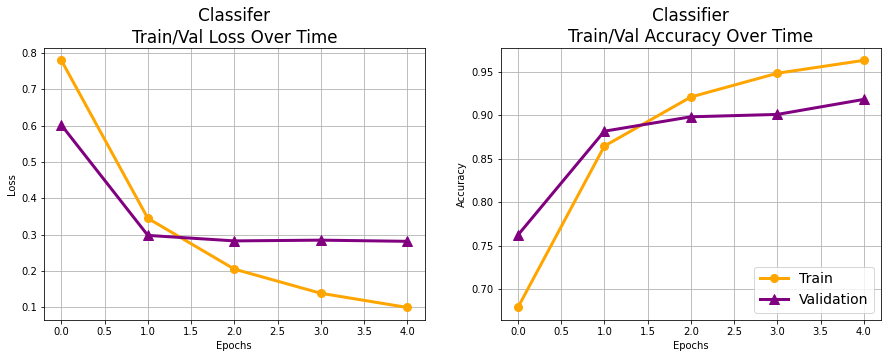

In [6]:
import train
from models import BaselineResnetClassifier

model = BaselineResnetClassifier(num_classes=3)
train.train_voxforge_classifier(model, data_dir=unzip_path)

# Save model to Google Drive

In [ ]:
# When a model needs to be saved for future analysis, it must be moved to Google drive, since colab is not-persistent

In [ ]:
# First, download the move_checkpoint.py script
user = "dgsmith1988"
repo = "ECSE-552-Final-Project"
src_dir = "Code"
pyfiles = ["move_checkpoint.py"]

for pyfile in pyfiles:
    !rm {pyfile}
    url = f"https://raw.githubusercontent.com/{user}/{repo}/rubert/{src_dir}/{pyfile}"
    !wget {url}

rm: cannot remove 'move_checkpoint.py': No such file or directory
--2022-03-19 16:44:25--  https://raw.githubusercontent.com/dgsmith1988/ECSE-552-Final-Project/rubert/Code/move_checkpoint.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1420 (1.4K) [text/plain]
Saving to: ‘move_checkpoint.py’

move_checkpoint.py  100%[===================>]   1.39K  --.-KB/s    in 0s      

2022-03-19 16:44:25 (23.8 MB/s) - ‘move_checkpoint.py’ saved [1420/1420]



In [ ]:
# NExt, move the desired file, and assigne a new meanigful_name. 
# it will be properly stored in the folder Checkpoints
from move_checkpoint import move_checkpoint
move_checkpoint(r'/content/DictLogger/0.1/checkpoints/epoch=4-step=10989.ckpt', 'first_step')

Running on Colab


In [ ]:
# TODO: which hyperparameters parmeters should be stored?
# TODO: do the checkpoints contain the required hyperparameters of a particular model? If not, is there a way to save these hyperparameters?
# TODO: what are the best ways to find the optimal parameters? Cross validation?
# TODO: should I include other metrics beyond loss?